# Extração de Características - Detecção de cantos

### Teoria
### O que é uma feature?

1. Na visão computacional, geralmente precisamos encontrar pontos de correspondência diferentes entre frames de um ambiente. Por quê? Se soubermos como duas imagens se relacionam, podemos usar as duas imagens para extrair informações delas.
    
2. Quando dizemos pontos correspondentes, estamos nos referindo, em um sentido geral, a características na cena que podemos reconhecer facilmente.Então, quais características devem ser procuradas?
Aquelas que devem ser exclusivamente reconhecível 


### Tipos de features em uma imagem

Para mencionar alguns:

    1. Arestas
    2. Cantos (também conhecidos como pontos de interesse)
    3. Blobs (também conhecidos como regiões de interesse) 

Nesta aula, vamos estudar os recursos de canto , especificamente.

### Por que um canto é tão especial?

Porque, como é a intersecção de duas arestas, representa um ponto no qual as direções dessas duas arestas mudam . Assim, o gradiente da imagem (em ambas as direções) tem uma alta variação, que pode ser usada para detectá-lo.

### Como funciona?

* Vamos procurar cantos. Como os cantos representam uma variação no gradiente da imagem, procuramos por essa "variação".

* Considere uma imagem em escala de cinza $I$. Vamos varrer uma janela $(w(x, y))$ (com deslocamentos $(u)$ na direção xe $(v)$ na direção y) $(I)$ e calcularemos a variação de intensidade.

### $E(u, v) = \sum_{x, y}w(x, y) [I(x + u, y + v) - I (x, y)]^{2}]$

Onde:

* $w(x, y)$ é a janela na posição $(x, y)$
* $(I(x, y)$ é a intensidade em $(x, y)$
* $I(x + u, y + v)$ é a intensidade na janela movida $(x + u, y + v)$ 

Como estamos à procura de janelas com cantos, estamos à procura de janelas com uma grande variação de intensidade. Por isso, temos que maximizar a equação acima, especificamente o termo:

### $\sum_{x, y}I(x + u, y + v) -I (x, y)]^{2}$

* Usando a expansão de Taylor :

### $E(u, v)=\sum_{x, y}I(x, y) + uI_{x} + vI_{y} - I(x, y)]^{2}$

Expandindo a equação e cancelando corretamente:

### $E (u, v)=\sum _{x, y}u^{2}I_{x}^{2} + 2uvI_{x} I_{y} + v^{2}I_{y}^{2}$


Uma pontuação é calculada para cada janela, para determinar se ela pode conter um canto:

### $R = det(M) - k(trace(M))^{2}$

Onde:
* $det (M) = \lambda_{1} \lambda_{2})$
* $trace (M) = \lambda_{1} + \lambda_{2}$

uma janela com uma pontuação $R$ maior que um determinado valor é considerada um "canto" 

Importando as bibliotecas e lendo a imagem em tons de cinza


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%notebook inline

img = cv2.imread("hospital2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

FUNÇÃO **cv.cornerHarris(img, blockSize, ksize, k)**

Entrada: 
         1. img =  Imagem de entrada em tons de cinza
         2. blockSize = Tamanho dos pixels vizinhos considerados como cantos para detecção.
         3. ksize = Parâmetro de abertura do derivado de Sobel usado.
         4. k = Parâmetro livre do detector Harris.
Saída:
         1. Pontos de detecção de canto da imagem.

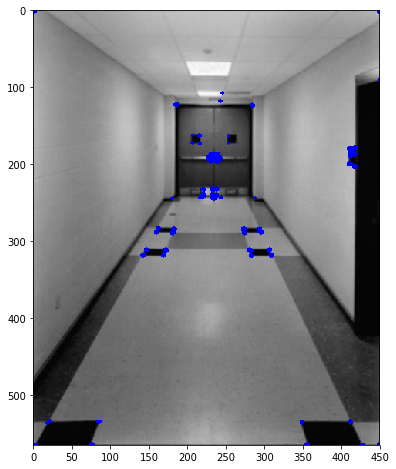

In [3]:
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.01)
element_estr = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
dst = cv2.dilate(dst, element_estr)

img[dst > 0.05*dst.max()] = [0,0,255]

fig = plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()